# Step 1: Download the dataset

Go to https://www.kaggle.com/mloey1/ahdd1, download the dataset and unzip it into the "datasets/arabic-digits" folder.

# Step 2: Load the dataset

In [1]:
# First, we'll importing some libraries we'll need.
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from utils import datasets
reload(datasets)
from utils import visualize
reload(visualize);
from utils import brain
reload(brain)
from utils.brain import Brain

np.set_printoptions(linewidth=120)

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
images, labels = datasets.load_arabic_digits()

In [3]:
images.shape

(60000, 28, 28)

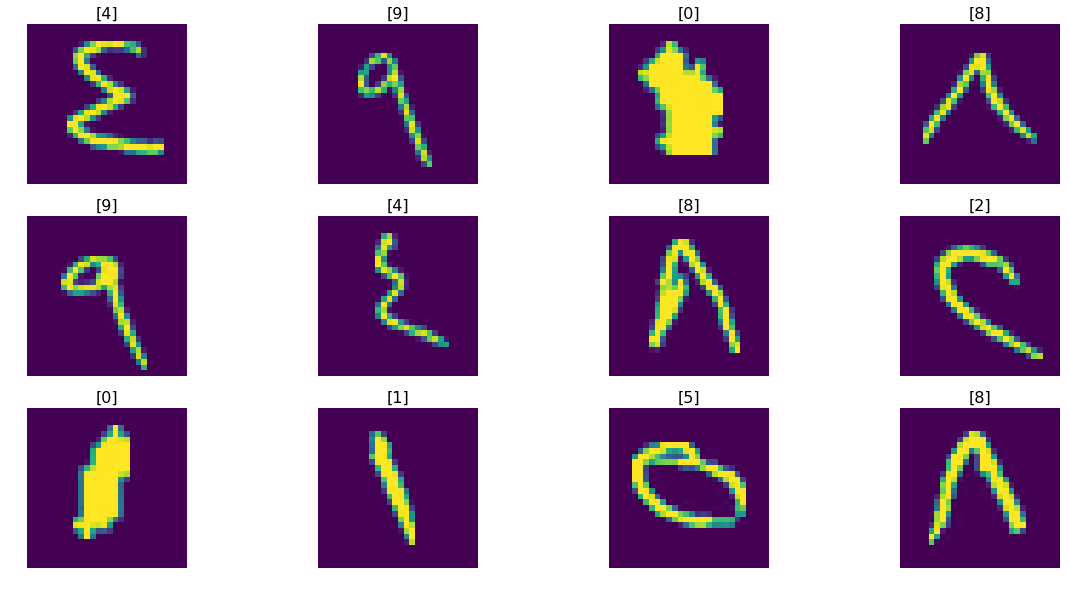

In [4]:
visualize.show_sample(images, labels)

In [5]:
images[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  18, 117, 214, 255, 166,  45,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  26, 154, 234, 228, 

In [6]:
labels[9]

array([9])

# Step 3: Teach the brain

In [7]:
brain = Brain()

In [8]:
images.shape, labels.shape

((60000, 28, 28), (60000, 1))

In [9]:
brain.learn(images, labels)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s - loss: 0.1195 - acc: 0.9660 - val_loss: 0.0881 - val_acc: 0.9778
Epoch 2/5
48000/48000 [==============================] - 6s - loss: 0.0463 - acc: 0.9872 - val_loss: 0.0877 - val_acc: 0.9804
Epoch 3/5
48000/48000 [==============================] - 7s - loss: 0.0353 - acc: 0.9911 - val_loss: 0.0963 - val_acc: 0.9810
Epoch 4/5
48000/48000 [==============================] - 7s - loss: 0.0279 - acc: 0.9928 - val_loss: 0.1303 - val_acc: 0.9792
Epoch 5/5
48000/48000 [==============================] - 7s - loss: 0.0261 - acc: 0.9941 - val_loss: 0.1058 - val_acc: 0.9834


# Step 4: Test the brain

In [10]:
images_test, labels_test = datasets.load_arabic_digits_test()

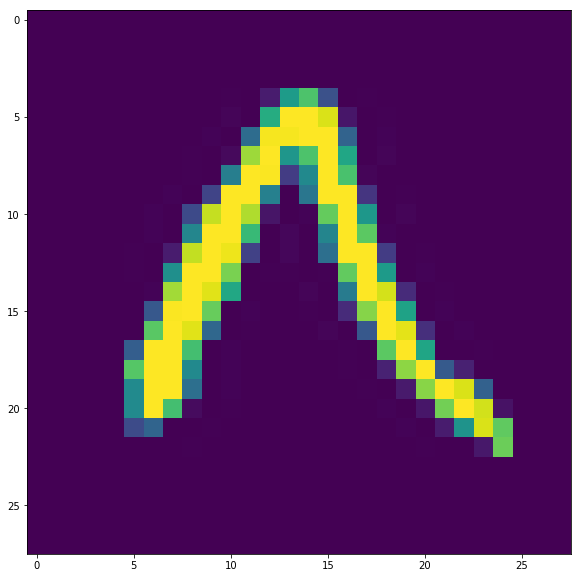

In [11]:
visualize.plot_image(images_test[18])

In [12]:
prediction = brain.predict(images_test[18])

1/1 [==============================] - 0s


In [13]:
prediction

array([8])

In [14]:
# Run the entire test set
predictions = brain.model.predict_classes(images_test)

 9952/10000 [============================>.] - ETA: 0s

In [15]:
predictions

array([0, 1, 2, ..., 7, 8, 9])

In [16]:
# Let's look at which ones we got wrong.
incorrect = np.where(predictions != labels_test[:, 0])[0]

In [17]:
incorrect

array([  25,   75,   85,  283,  324,  365,  375,  494,  556,  603,  609,  706,  738,  748,  758,  774,  798, 1028, 1074,
       1280, 1283, 1605, 1608, 1611, 1615, 1902, 1904, 1910, 1924, 1945, 1949, 1959, 1966, 1968, 1984, 1986, 1989, 2020,
       2030, 2065, 2280, 2283, 2292, 2322, 2402, 2634, 2644, 2694, 2880, 2888, 2898, 3026, 3035, 3036, 3052, 3054, 3066,
       3068, 3088, 3094, 3098, 3174, 3305, 3315, 3335, 3496, 3514, 3526, 3546, 3586, 3593, 3596, 3601, 3611, 3627, 3705,
       3711, 3715, 3725, 3729, 3745, 3748, 3768, 3770, 3796, 4060, 4070, 4314, 4344, 4354, 4364, 4470, 4505, 4605, 4629,
       4645, 4646, 4665, 4695, 4698, 4703, 4744, 4747, 4753, 4764, 4774, 4783, 4792, 4940, 4946, 5010, 5018, 5028, 5138,
       5358, 5445, 5505, 5509, 5549, 5555, 5575, 5613, 5623, 5638, 5653, 5657, 5658, 5668, 5675, 5678, 5688, 5698, 5705,
       5710, 5734, 5750, 5784, 5817, 5827, 5828, 5838, 5847, 5854, 5858, 5867, 5869, 5874, 5897, 5909, 5954, 5975, 6074,
       6125, 6208, 6236, 6248, 6

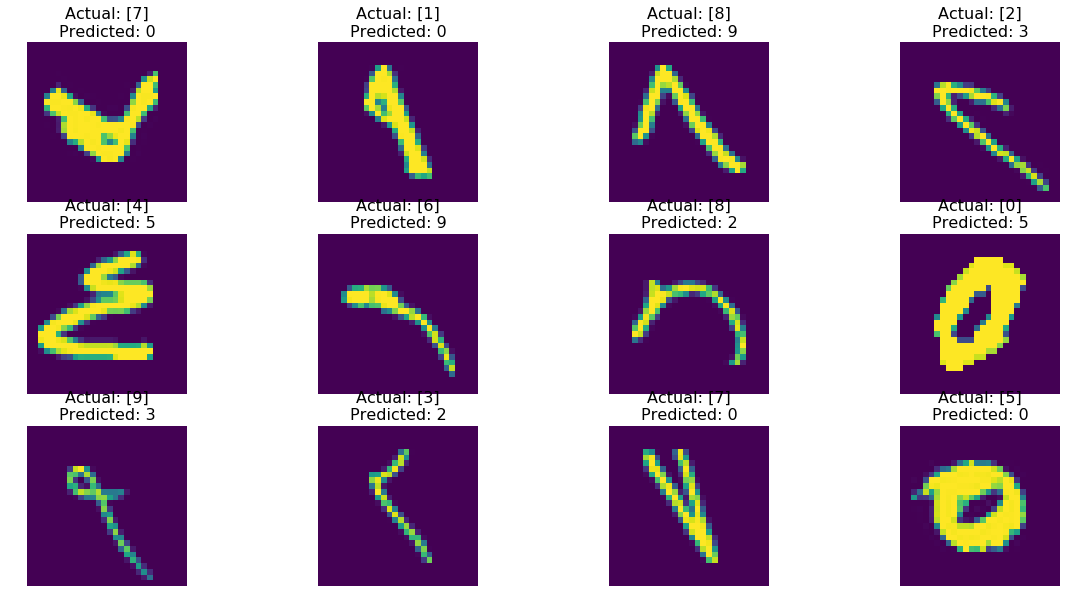

In [18]:
visualize.show_sample_incorrect(images_test, incorrect, labels_test, predictions)